In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.cluster import DBSCAN

In [4]:
%matplotlib inline

In [5]:
train = pd.read_feather('../data/project_train.f')

In [6]:
DEALER = ~train.actual_price.isna()
train['is_dealer'] = DEALER

In [7]:
options = pd.read_csv('../data/option_names.csv')
options.head()

,id,viewItemLabel
0,13705,Гидравлический
1,13706,Электрогидравлический
2,13707,Электрический
3,13709,Кондиционер
4,13710,Климат-контроль однозонный


In [8]:
train.head()

,actual_price,price,start_date,close_date,sale_end_date,brand,model,generation,modification,equipment,...,fary_mult,multimedia_navigacia_mult,obogrev_mult,pamyat_nastroek_mult,podushki_bezopasnosti_mult,pomosh_pri_vozhdenii_mult,protivoygonnaya_sistema_mult,salon_mult,upravlenie_klimatom_mult,is_dealer
0,NaN,1950000.000000000000000,2023-02-18 13:37:49.603445,2023-02-19 15:06:28.603039,NaT,Volkswagen,Passat,B8 (2014—2020),2.0 TDI DSG (150 л.с.),Highline,...,"[13783,13784]","[13763,13764,13765,13766,13767,13768,13769,137...","[13721,13722,13723,13724]",None,"[13751,13752,13753,13754,13755]","[13739,13740,13741,13742,13744,13745,13746]","[13747,13748,13749]",[13719],[13713],False
1,NaN,1999000.000000000000000,2023-02-11 19:49:43.158681,2023-02-24 11:04:43.685727,NaT,Volkswagen,Passat,B8 (2014—2020),2.0 TDI DSG (150 л.с.),Highline,...,"[13783,13784,13785]","[13763,13764,13765,13767,13768,13769,13770,137...","[13721,13723,13724]",None,"[13751,13753,13754,13755]","[13739,13740,13741,13742,13744,13745,13746]","[13748,13749]",[13719],"[13712,13713]",False
2,NaN,1780000.000000000000000,2023-02-04 14:39:08.813905,2023-02-24 20:48:25.210683,NaT,Volkswagen,Passat,B8 (2014—2020),2.0 TDI DSG (150 л.с.),None,...,[13783],"[13768,13772]",None,None,"[13751,13752,13753,13754]","[13740,13741,13742,13744,13745,13746]",[13749],None,None,False
3,NaN,1900000.000000000000000,2023-02-04 08:04:20.229815,2023-02-15 17:20:49.248078,NaT,Volkswagen,Passat,B8 (2014—2020),2.0 TDI DSG (150 л.с.),Highline,...,"[13783,13784,13785]","[13763,13764,13765,13768,13769,13770,13771,13772]","[13721,13723,13724]",None,"[13751,13752,13753,13754,13755]","[13739,13740,13741,13742,13743,13744,13745,13746]","[13747,13749]",[13719],"[13712,13713]",False
4,NaN,1650000.000000000000000,2023-02-04 01:42:29.723361,2023-02-04 12:26:13.572696,NaT,Volkswagen,Passat,B8 (2014—2020),2.0 TDI DSG (150 л.с.),Conceptline,...,None,None,None,None,None,None,None,None,None,False


In [9]:
'Число записей: {}, колонок: {}'.format(*train.shape)

'Число записей: 1424484, колонок: 71'

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424484 entries, 0 to 1424483
Data columns (total 71 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   actual_price                  81426 non-null    float64       
 1   price                         1424484 non-null  object        
 2   start_date                    1343058 non-null  datetime64[ns]
 3   close_date                    1343058 non-null  datetime64[ns]
 4   sale_end_date                 81426 non-null    datetime64[ns]
 5   brand                         1424484 non-null  object        
 6   model                         1424484 non-null  object        
 7   generation                    1424484 non-null  object        
 8   modification                  1424484 non-null  object        
 9   equipment                     1097413 non-null  object        
 10  body_type                     1424484 non-null  object        
 11

In [11]:
# в
option_cols = ['audiosistema', 'diski', 'electropodemniki', 'fary', 'salon', 'upravlenie_klimatom', 'usilitel_rul']
categories = ['crashes', 'is_taxi', 'is_pledged', 'is_restrictions', 'is_carsharing']

int_cols = option_cols + categories  # надо преобразовать к инту

In [12]:
for col in int_cols:
    train.loc[:, col] = train[col].astype('Int32') 

In [13]:
train['price'] = train.price.astype(float)

In [14]:
train['start_date'] = pd.to_datetime(train['start_date']).dt.date
train['close_date'] = pd.to_datetime(train['close_date']).dt.date
train['sale_end_date'] = pd.to_datetime(train['sale_end_date']).dt.date

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424484 entries, 0 to 1424483
Data columns (total 71 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   actual_price                  81426 non-null    float64
 1   price                         1424484 non-null  float64
 2   start_date                    1343058 non-null  object 
 3   close_date                    1343058 non-null  object 
 4   sale_end_date                 81426 non-null    object 
 5   brand                         1424484 non-null  object 
 6   model                         1424484 non-null  object 
 7   generation                    1424484 non-null  object 
 8   modification                  1424484 non-null  object 
 9   equipment                     1097413 non-null  object 
 10  body_type                     1424484 non-null  object 
 11  drive_type                    1424484 non-null  object 
 12  transmission_type           

## EDA

### Распределение цен на авто: у юзеров и у дилеров

In [16]:
actual_price_dist = pd.DataFrame(
    {
        'price': train.loc[DEALER, 'actual_price'].copy(),
        'price_type': 'close'
    }
)

user_price_dist = pd.DataFrame(
    {
        'price': train.loc[DEALER, 'price'].copy(),
        'price_type': 'start'
    }
)

price_dist = pd.concat([actual_price_dist, user_price_dist], axis=0)

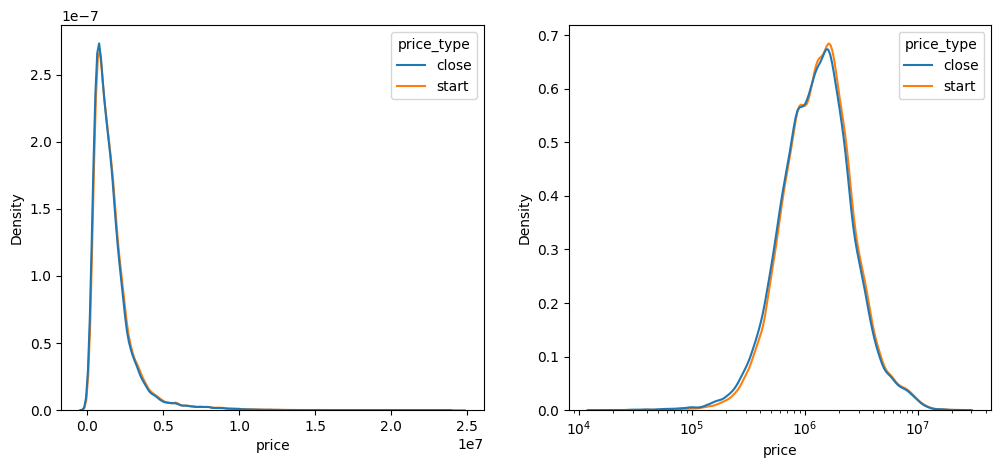

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(
    price_dist, 
    x='price', 
    hue='price_type', 
    log_scale=False,
    ax=ax1
)
sns.kdeplot(
    price_dist, 
    x='price', 
    hue='price_type', 
    log_scale=True,
    ax=ax2
);

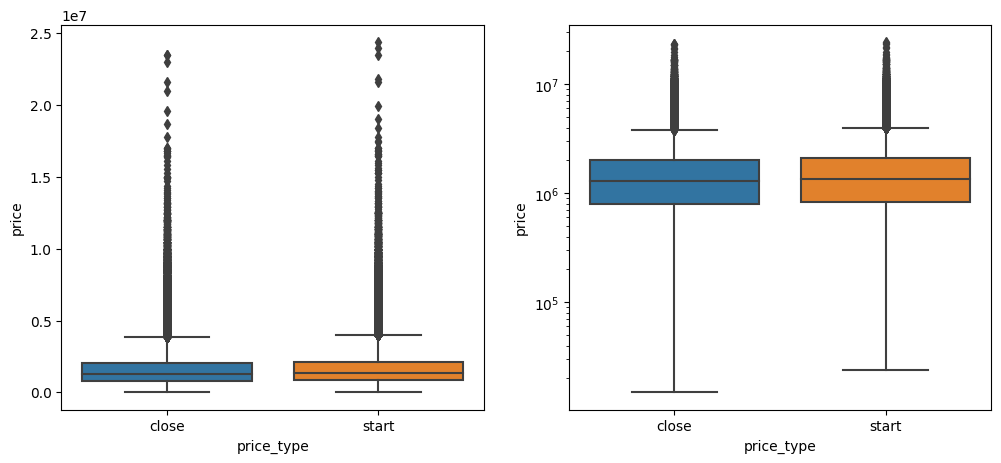

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(
    price_dist,
    x='price_type',
    y='price',
    ax=ax1,
)

b = sns.boxplot(
    price_dist,
    x='price_type',
    y='price',
    ax=ax2,
)
b.set_yscale('log')

In [19]:
from scipy.stats import ttest_ind


t, p = ttest_ind(
    np.log(train[DEALER].price), 
    np.log(train[DEALER].actual_price),
    equal_var=True,
    alternative='greater'
)
t, p

(13.082222473687569, 2.1772247893853798e-39)

### Даты

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424484 entries, 0 to 1424483
Data columns (total 71 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   actual_price                  81426 non-null    float64
 1   price                         1424484 non-null  float64
 2   start_date                    1343058 non-null  object 
 3   close_date                    1343058 non-null  object 
 4   sale_end_date                 81426 non-null    object 
 5   brand                         1424484 non-null  object 
 6   model                         1424484 non-null  object 
 7   generation                    1424484 non-null  object 
 8   modification                  1424484 non-null  object 
 9   equipment                     1097413 non-null  object 
 10  body_type                     1424484 non-null  object 
 11  drive_type                    1424484 non-null  object 
 12  transmission_type           

In [21]:
train['duration'] = (train.close_date - train.start_date).dt.days

Есть ошибки - пара объявлений, которые были проданы раньше, чем опубликованы

In [22]:
train[(train.duration < 0)]

,actual_price,price,start_date,close_date,sale_end_date,brand,model,generation,modification,equipment,...,multimedia_navigacia_mult,obogrev_mult,pamyat_nastroek_mult,podushki_bezopasnosti_mult,pomosh_pri_vozhdenii_mult,protivoygonnaya_sistema_mult,salon_mult,upravlenie_klimatom_mult,is_dealer,duration
1061788,NaN,835000.0,2022-08-09,2022-07-16,NaT,Mazda,6,GH рестайлинг (2009—2013),1.8 MT (120 л.с.),Touring Plus,...,"[13763,13764,13765,13768,13770]","[13721,13723,13724]",None,[13751],"[13739,13740,13743,13745,13746]","[13748,13749,13750]",[13719],[13712],False,-24.0
1107909,NaN,1500000.0,2022-04-18,2022-04-14,NaT,Mazda,CX-7,I рестайлинг (2009—2012),2.5 AT (163 л.с.),Touring,...,[13770],"[13721,13723,13724]",None,None,None,None,None,None,False,-4.0


#### Распределение длительности продажи

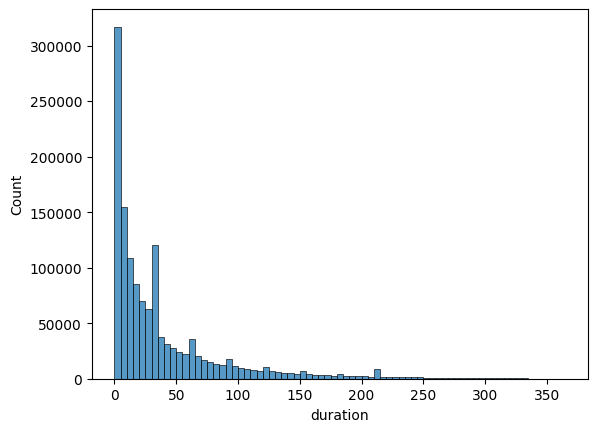

In [23]:
h = sns.histplot(
    train[train.duration >= 0],
    x='duration',
    binwidth=5,
)

Посмотрим на количество открытых объявлений по месяцам

In [24]:
get_month = lambda x: x.month
train['start_month'] = train.start_date.apply(get_month)
train['close_month'] = train.close_date.apply(get_month)
train['sale_end_month'] = train.sale_end_date.apply(get_month)

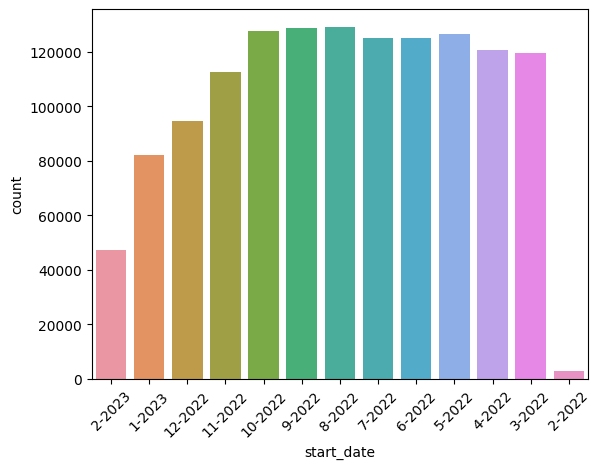

In [25]:
# sns.countplot(
#     x=pd.concat(
#         [
#             train.start_date.apply(lambda x: x.month),
#             train.close_date.apply(lambda x: x.month)
#         ]
#     ),
#     hue=['start_month'] * train.start_date.shape[0] + ['close_month'] * train.close_date.shape[0]
# )

h = sns.countplot(
    x=train.start_date.apply(
        lambda x: f"{x.month}-{x.year}" if not pd.isnull(x) else pd.NaT
    ),
#     ordeer=''
);
plt.xticks(rotation=45);

С ноября по январь продавали меньше

#### Бренды

In [26]:
f'{pd.Series(train.brand.apply(lambda x: x.strip().lower()).unique()).duplicated().sum()} дубликатов '

'0 дубликатов '

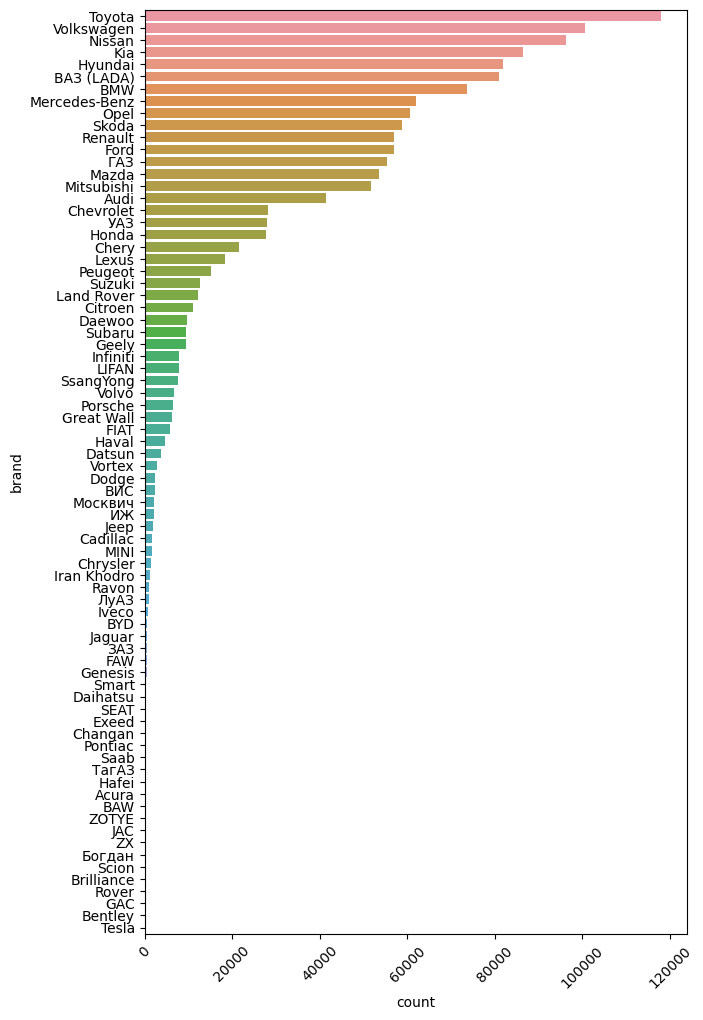

In [27]:
f, ax = plt.subplots(1, 1, figsize=(7, 12))
g = sns.countplot(
    train, 
    y='brand', 
    order=train.brand.value_counts().index,
    ax=ax
)
plt.xticks(rotation=45);

Мы можем заметить, что есть очень редкие бренды (тесла, бентли и пр.) - посмотрим, сколько объявлений с 15 самыми редкими из них:

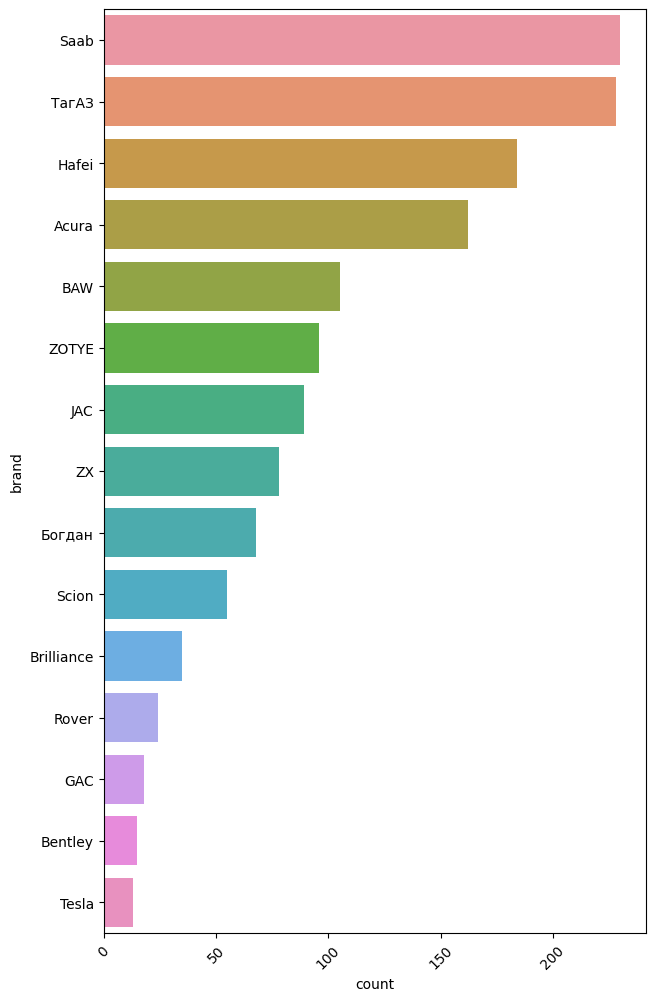

In [28]:
f, ax = plt.subplots(1, 1, figsize=(7, 12))
g = sns.countplot(
    train, 
    y='brand', 
    order=train.brand.value_counts().index[-15:],
    ax=ax
)
plt.xticks(rotation=45);

#### Такси

Среди обычных пользовательских сделок нет информации по принадлежности машины к таксопарку

In [29]:
(~train[~DEALER].is_taxi.isna()).sum()

0

In [30]:
train['is_taxi'] = train.is_taxi.astype(float)

In [31]:
train[DEALER].is_taxi.value_counts(dropna=False)

 0.0    79901
 1.0      965
 NaN      490
-1.0       70
Name: is_taxi, dtype: int64

Посмотрим на то, как принадлежность к таксопарку влияет на цену авто:

<Axes: xlabel='is_taxi', ylabel='actual_price'>

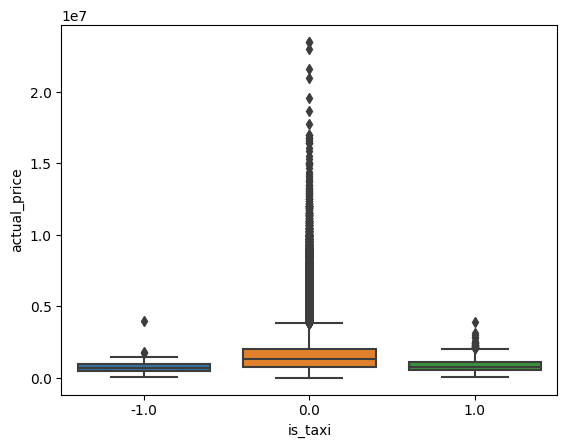

In [32]:
sns.boxplot(
    train[DEALER],
    x='is_taxi',
    y='actual_price'
)

#### Машины под залогом

Среди пользовательских машин нет информации о нахождении под залогом

In [33]:
(~train[~DEALER].is_pledged.isna()).sum()

0

In [34]:
train['is_pledged'] = train.is_pledged.astype(float)
train[DEALER].is_pledged.value_counts(dropna=False)

 0.0    72326
 1.0     8540
 NaN      490
-1.0       70
Name: is_pledged, dtype: int64

<Axes: xlabel='is_pledged', ylabel='actual_price'>

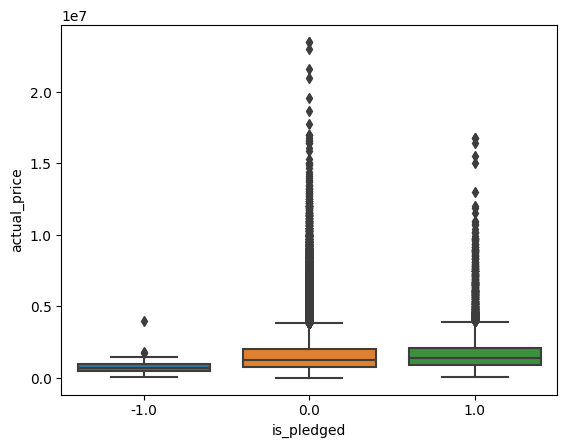

In [35]:
sns.boxplot(
    train[DEALER],
    x='is_pledged',
    y='actual_price'
)

#### Машины с ограничениями

In [36]:
(~train[~DEALER].is_restrictions.isna()).sum()

0

In [37]:
train['is_restrictions'] = train.is_restrictions.astype(float)
train[DEALER].is_restrictions.value_counts(dropna=False)

 0.0    80245
 1.0      621
 NaN      490
-1.0       70
Name: is_restrictions, dtype: int64

<Axes: xlabel='is_restrictions', ylabel='actual_price'>

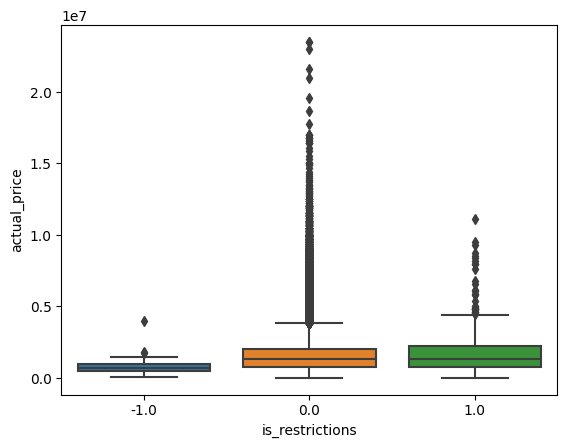

In [38]:
sns.boxplot(
    train[DEALER],
    x='is_restrictions',
    y='actual_price'
)

#### Машины из карша

In [39]:
(~train[~DEALER].is_carsharing.isna()).sum()

0

In [40]:
train['is_carsharing'] = train.is_carsharing.astype(float)
train[DEALER].is_carsharing.value_counts(dropna=False)

0.0    80708
NaN      560
1.0      158
Name: is_carsharing, dtype: int64

<Axes: xlabel='is_carsharing', ylabel='actual_price'>

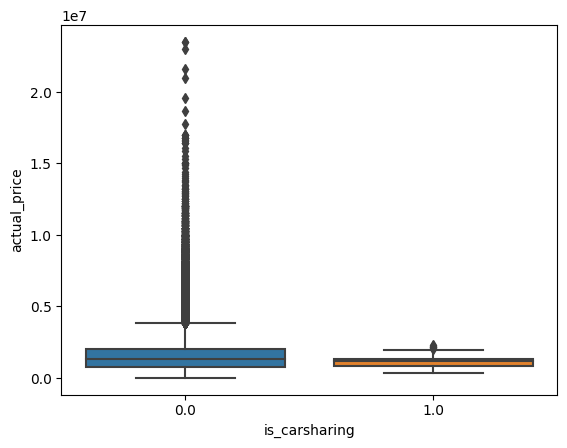

In [41]:
sns.boxplot(
    train[DEALER],
    x='is_carsharing',
    y='actual_price'
)

#### Crashes

Пользователи не указывают информацию об авариях авто:

In [42]:
(~train[~DEALER].crashes.isna()).sum()

0

In [43]:
train['crashes'] = train.crashes.astype(float)
train[DEALER].crashes.value_counts(dropna=False)

0.0     51499
1.0     19530
2.0      6590
3.0      2184
4.0       707
NaN       490
5.0       261
6.0        91
7.0        46
8.0        13
10.0        7
9.0         6
11.0        2
Name: crashes, dtype: int64

<Axes: xlabel='crashes', ylabel='actual_price'>

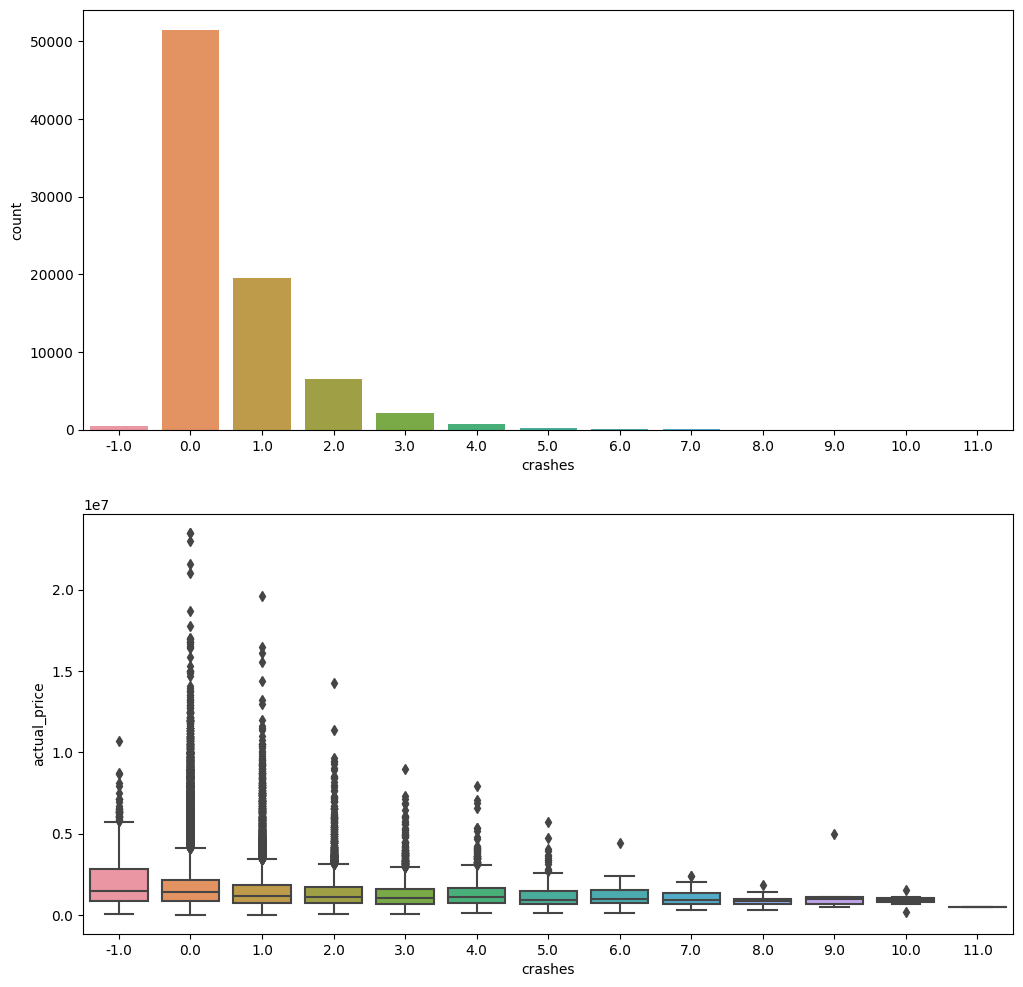

In [44]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
sns.countplot(
    x=train[DEALER].crashes.fillna(-1),
    ax=ax1
)
sns.boxplot(
    x=train[DEALER].crashes.fillna(-1),
    y=train[DEALER].actual_price,
    ax=ax2
)


<Axes: >

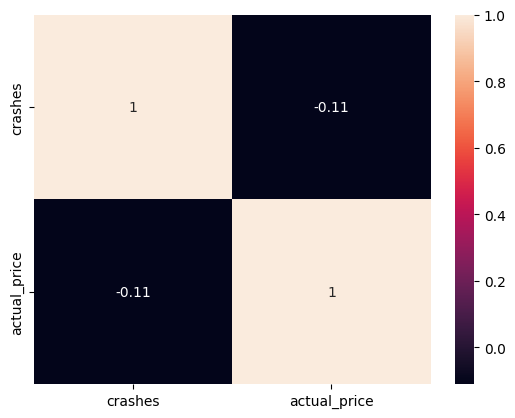

In [45]:
sns.heatmap(train[['crashes', 'actual_price']].corr(), annot=True)

#### Пробег

In [46]:
train[['mileage', 'actual_price']].corr()

,mileage,actual_price
mileage,1.000000,-0.420668
actual_price,-0.420668,1.000000


In [47]:
train[['mileage', 'price']].corr()

,mileage,price
mileage,1.000000,-0.367989
price,-0.367989,1.000000


In [48]:
pd.concat([1 / train.mileage, train.actual_price], axis=1).corr()

,mileage,actual_price
mileage,1.000000,0.238472
actual_price,0.238472,1.000000


<Axes: xlabel='mileage', ylabel='actual_price'>

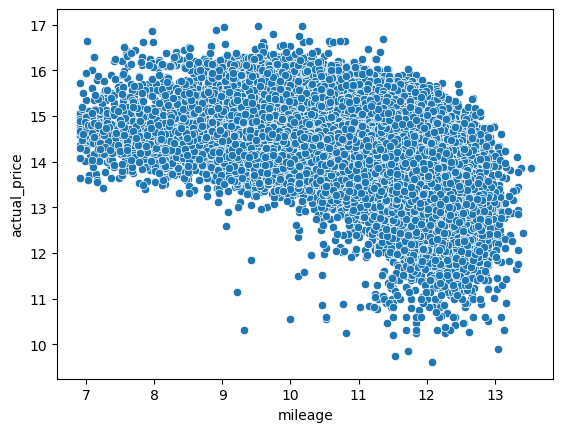

In [49]:
sns.scatterplot(
    x=np.log(train.mileage),
    y=np.log(train.actual_price)
)

#### Геолокация

In [52]:
geo = train[['latitude', 'longitude']]

In [56]:
from pathlib import Path
import requests
import pandas as pd

url = ("https://raw.githubusercontent.com/"
      "epogrebnyak/ru-cities/main/assets/towns.csv")

# save file locally
p = Path("towns.csv")
if not p.exists():
    content = requests.get(url).text
    p.write_text(content, encoding="utf-8")

# read as dataframe
towns = pd.read_csv("towns.csv")
(towns.sample(5))

,city,population,lat,lon,region_name,region_name_ao,region_iso_code,federal_district,okato,oktmo,kladr_id,fias_id,place_id
581,Городище,7.7,53.272692,45.702614,Пензенская область,NaN,RU-PNZ,Приволжский,56218501000,56618101001,5800800100000,b9d45c36-c679-40bb-8168-7ab78913a2c7,258523756.0
1035,Урай,40.5,60.129695,64.803851,Тюменская область,Ханты-Мансийский автономный округ – Югра,RU-KHM,Уральский,71138000000,71878000001,8600000900000,610abc14-c127-4d7c-8697-31cb5c7c47f2,258444746.0
855,Хвалынск,12.3,52.495157,48.104577,Саратовская область,NaN,RU-SAR,Приволжский,63249501000,63649101001,6400001200000,ac586a68-2f14-403e-9ce0-46c01832652d,109050996.0
658,Октябрьский,114.1,54.481531,53.465597,Республика Башкортостан,NaN,RU-BA,Приволжский,80435000000,80735000001,200000400000,abd1bc35-ec51-437a-abee-76a4f620f662,259348210.0
796,Белая Калитва,39.3,48.176974,40.803353,Ростовская область,NaN,RU-ROS,Южный,60206501000,60606101001,6100500100000,2d38257c-c09e-405d-af01-93fc9cd3f6cd,259139051.0


In [63]:
train[['latitude', 'longitude']].head()

,latitude,longitude
0,52.608782,39.599346
1,64.539393,40.516939
2,55.755814,37.617635
3,55.557174,37.708644
4,59.939095,30.315868


In [77]:
# Latitude & Longitude input
Latitude = "53.60782"
Longitude = "32.59346"
 
location = geolocator.reverse(Latitude+","+Longitude)
 
# Display
location.raw['address']

{'village': 'Литвиновка',
 'municipality': 'Кузьмичское сельское поселение',
 'county': 'Ершичский район',
 'state': 'Смоленская область',
 'ISO3166-2-lvl4': 'RU-SMO',
 'region': 'Центральный федеральный округ',
 'country': 'Россия',
 'country_code': 'ru'}

In [78]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")


def city_state_country(row):
    coord = f"{row['latitude']}, {row['longitude']}"
    location = geolocator.reverse(coord, exactly_one=True)
    try:
        return location.raw['address']['state']
    except KeyError:
        return np.nan


In [79]:
train[DEALER, 'region'] = train[DEALER].apply(city_state_country, axis=1)

KeyboardInterrupt: 

<Axes: xlabel='longitude', ylabel='latitude'>

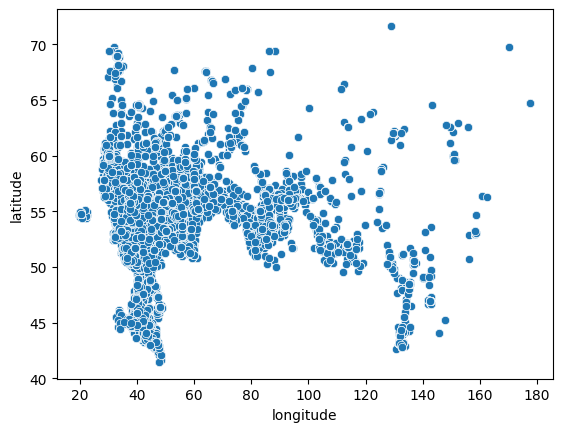

In [53]:
sns.scatterplot(
    geo,
    x='longitude',
    y='latitude'
)

Попробую кластеризовать геоданные

In [2]:
dbscan = DBSCAN(
    eps=1,
    min_samples=1
)

NameError: name 'DBSCAN' is not defined